In [16]:
!pip install astropy matplotlib scikit-image

In [17]:
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage import median_filter
from skimage.metrics import peak_signal_noise_ratio, structural_similarity

In [18]:
hdul = fits.open('/content/hlsp_heritage_hst_acs-wfc_m51_f555w_v1_drz_sci.fits')
image_data = hdul[0].data
hdul.close()


In [19]:
image_data = image_data / np.max(image_data)

In [20]:
def crop_center(img, cropx=512, cropy=512):
    y, x = img.shape
    startx = x // 2 - cropx // 2
    starty = y // 2 - cropy // 2
    return img[starty:starty+cropy, startx:startx+cropx]


In [ ]:
image_data = crop_center(image_data)

noise_sigma = 0.1
noisy_image = image_data + np.random.normal(0, noise_sigma, image_data.shape)

In [22]:
image_data.shape

(512, 512)

In [23]:
median_denoised = median_filter(noisy_image, size=3)

In [24]:
def stretch_contrast(image, lower_percentile=1, upper_percentile=99):
    p_low, p_high = np.percentile(image, (lower_percentile, upper_percentile))
    stretched = np.clip(image, p_low, p_high)
    return (stretched - p_low) / (p_high - p_low + 1e-8)

In [25]:
original_vis = stretch_contrast(image_data)
noisy_vis = stretch_contrast(noisy_image)
median_vis = stretch_contrast(median_denoised)


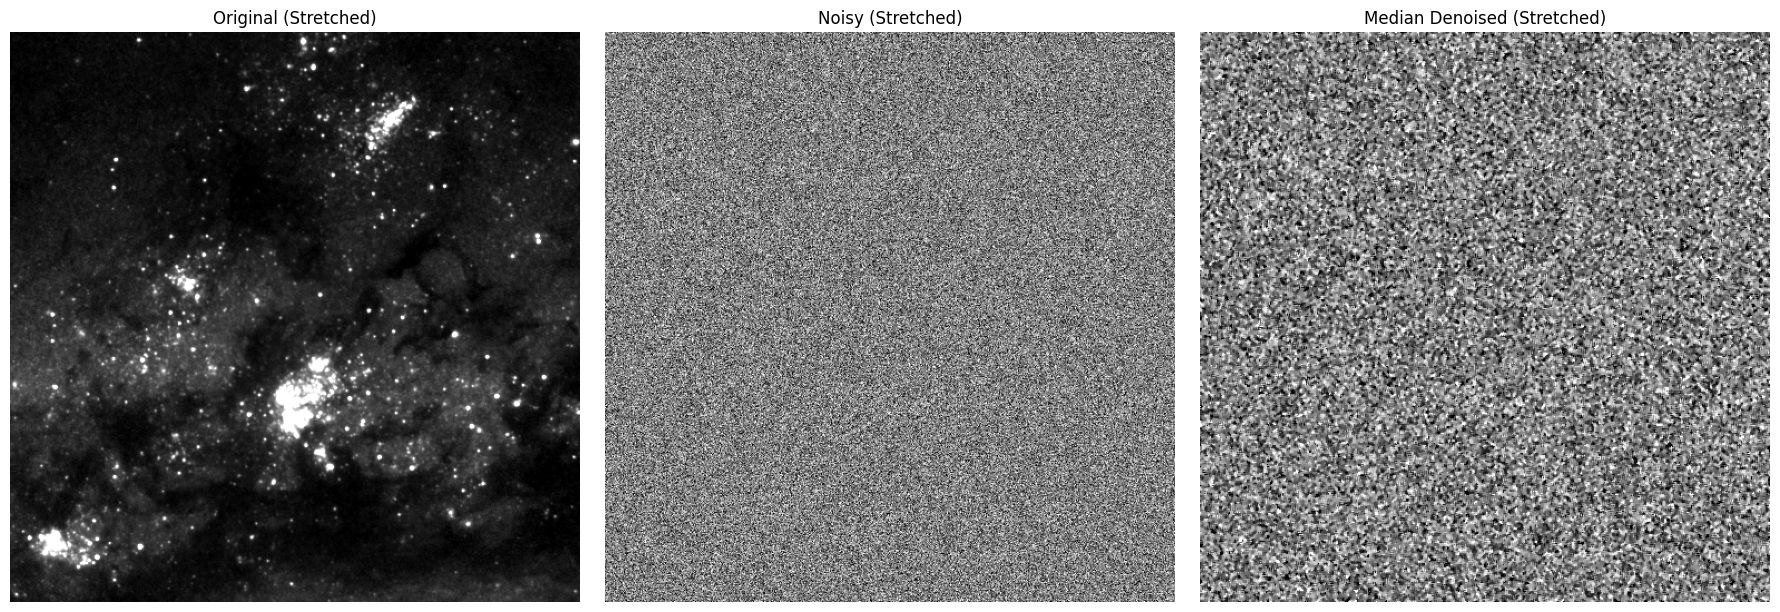

In [26]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
titles = ['Original (Stretched)', 'Noisy (Stretched)', 'Median Denoised (Stretched)']
images = [original_vis, noisy_vis, median_vis]

for ax, img, title in zip(axes, images, titles):
    ax.imshow(img, cmap='gray', origin='lower')
    ax.set_title(title)
    ax.axis('off')

plt.tight_layout()
plt.show()

In [27]:
psnr = peak_signal_noise_ratio(image_data, median_denoised, data_range=1.0)
ssim = structural_similarity(image_data, median_denoised, data_range=1.0)

print("Median Filter → PSNR:", psnr)
print("Median Filter → SSIM:", ssim)

Median Filter → PSNR: 27.792330332877007
Median Filter → SSIM: 0.2192358774815396
